In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
path=Path("Resources/lending_data.csv")
# Review the DataFrame
lending_df=pd.read_csv(path)

In [4]:
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [5]:
# Separate the data into labels and features
# Separate the y variable, the labels
y=lending_df["loan_status"]
# Separate the X variable, the features
X=lending_df.drop("loan_status",axis="columns")



In [6]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [7]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [8]:
# Check the balance of our target values
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train,X_test,y_train, y_test=train_test_split(X,y,random_state=1)

In [10]:
lending_df.shape

(77536, 8)

In [11]:
X.shape

(77536, 7)

In [12]:
X_train.shape

(58152, 7)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model=LogisticRegression(random_state=1)

# Fit the model using training data
logistic_model.fit(X_train,y_train)

C:\Users\manal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [14]:
# Make a prediction using the testing data
y_prediction=logistic_model.predict(X_test)


In [15]:
print("this is the machine's answer")
display(y_prediction)
print("this is the correct answer")
display(y_test)

this is the machine's answer


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

this is the correct answer


60914    0
36843    0
1966     0
70137    0
27237    0
        ..
45639    0
11301    0
51614    0
4598     0
2793     0
Name: loan_status, Length: 19384, dtype: int64

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Print the balanced_accuracy score of the model
print(balanced_accuracy_score(y_test,y_prediction))

0.967989851522121


In [17]:
# Generate a confusion matrix for the model
confusion_matrix(y_test,y_prediction)

array([[18655,   110],
       [   36,   583]], dtype=int64)

<Axes: >

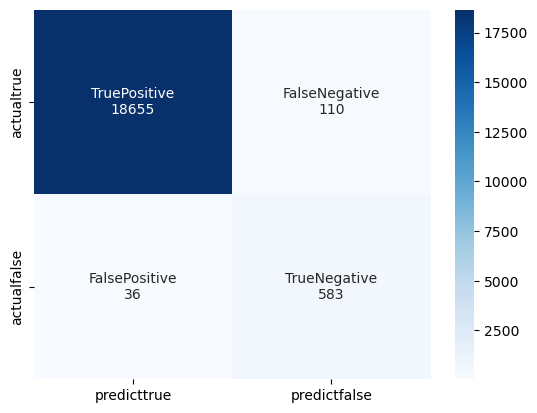

In [22]:
import seaborn as sns
arr=np.array([[18655,110],
       [36,583]])
labels = ["TruePositive", "FalseNegative", "FalsePositive", "TrueNegative"]
numbers = arr.flatten()
combined = [f"{i}\n{j}" for i,j in zip(labels, numbers)]
combined = np.array(combined).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=combined,cmap="Blues",fmt="",xticklabels=["predicttrue","predictfalse"],
           yticklabels=["actualtrue","actualfalse"])

In [19]:
# Print the classification report for the model
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**     
1. For accuracy    
Accuracy=(TruePositive+TrueNegative)/(TruePositive+TrueNegative+FalsePositive+FalseNegative)=(18655+583)/(18655+583+36+110)=99.24%
2. For Percision
Percision=TruePositive/(TruePositive+FalsePositive)=18655/(18655+36)=99.80%
3. Recall
recall=TruePositive/(TruePositive+FalseNegative)=18655/(18655+110)=99.41%     
### Our Conclusion:
The precision for the 0 class is 100% which means the model correctly made the positive prediction everytime. The recall of that class is 99%.    
On the other hand, the precision for class (1) is not good as expected because the percision is only 84%, but the recall for class (1) is acceptable, it predicted a higher risk sample. 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [24]:
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [25]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros_model=RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled,y_resampled=ros_model.fit_resample(X_train, y_train)

In [26]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

loan_status
0    56271
1    56271
Name: count, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [27]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lro_model=LogisticRegression(random_state=1)
# Fit the model using the resampled training data
lro_model.fit(X_resampled,y_resampled)

# Make a prediction using the testing data
yo_prediction=lro_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [28]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, yo_prediction)

0.9935981855334257

In [29]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, yo_prediction)

array([[18646,   119],
       [    4,   615]], dtype=int64)

In [30]:
# Print the classification report for the model
print(classification_report(y_test,yo_prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
1. For accuracy    
Accuracy=(TruePositive+TrueNegative)/(TruePositive+TrueNegative+FalsePositive+FalseNegative)=(18646+615)/(18646+615+4+119)=99.36%
2. For Percision
Percision=TruePositive/(TruePositive+FalsePositive)=18646/(18646+4)=99.97%
3. Recall
recall=TruePositive/(TruePositive+FalseNegative)=18646/(18646+119)=99.36%     
### Our Conclusion:
The precision for the  class (0) is 100% which means the model correctly made the positive prediction everytime. The recall of that class is 99%.    
On the other hand, the previous model recall is 94% and this oversampling recall model is 99%, which means this model has a higher standard because the recall is high. At the new standard, the percision is 84%. 